In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
t=pd.read_csv('telco_churn_data.csv')

In [3]:
t.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [63]:
t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

i'm gonna select the customers who have churned:specifically the customers with churn value=1(TRUE)

In [2]:
churned_customer=t[t['Churn Value']==1]

NameError: name 't' is not defined

Now that we have the churned customers,we have to identify the issues

In [1]:
counts = churned_customer['Product/Service Issues Reported'].value_counts()
counts=counts.to_frame()
plt.bar(counts.index, counts['count'],color='green',edgecolor='black')

NameError: name 'churned_customer' is not defined

Among the churned customers,there are customers who have not reported any issues so we have to select the churned customers who have issues  

In [10]:
churned_customers_issues=churned_customer[churned_customer['Product/Service Issues Reported']!=0]
counts1=churned_customers_issues['Churn Category'].value_counts()
counts1=counts1.to_frame()

### ChurnCategory

<BarContainer object of 5 artists>

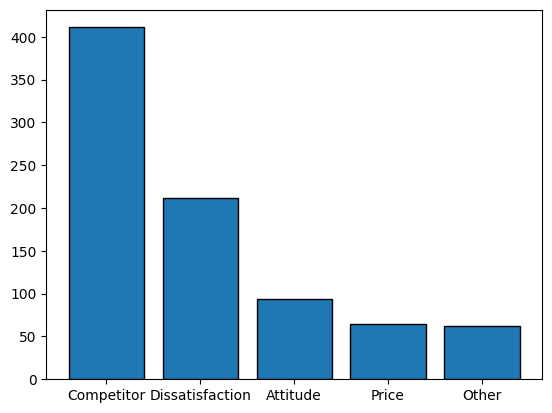

In [13]:
plt.bar(counts1.index, counts1['count'],edgecolor='black')

In [14]:
counts2=churned_customers_issues['Churn Reason'].value_counts()
counts2

Now if we get more specific,we start with the most common churn category:
### The Competitor

In [16]:
counts2 = churned_customers_issues[churned_customers_issues['Churn Category'] == 'Competitor']['Churn Reason'].value_counts()
counts2=counts2.to_frame()
counts2

,count
Churn Reason,
Competitor had better devices,273
Competitor made better offer,79
Competitor offered more data,30
Competitor offered higher download speeds,29


Now for people who think that 'the competitor made better offer' => what offer did they choose?Did we offer phone service?did we offer internet service?==>To identify which service is basically the problem

<BarContainer object of 2 artists>

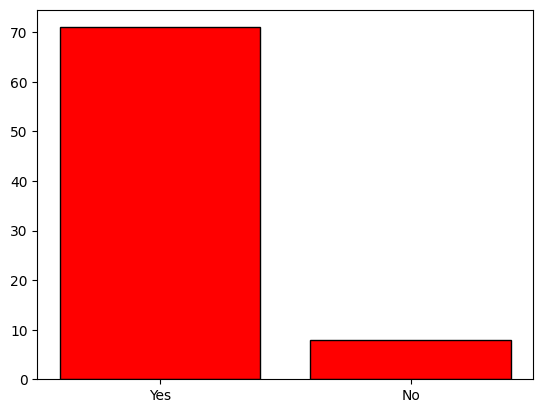

In [17]:
phone_service_counts = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Competitor made better offer') & (churned_customers_issues['Churn Category'] == 'Competitor')]['Phone Service'].value_counts()
plt.bar(phone_service_counts.index,phone_service_counts.values,color='red',edgecolor='black')

<BarContainer object of 2 artists>

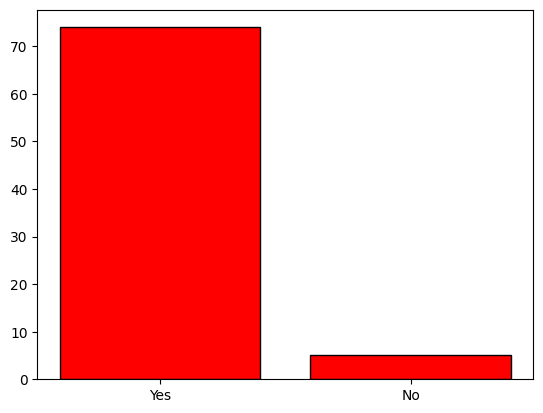

In [18]:
internet_service_counts = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Competitor made better offer') & (churned_customers_issues['Churn Category'] == 'Competitor')]['Internet Service'].value_counts()
plt.bar(internet_service_counts.index,internet_service_counts.values,color='red',edgecolor='black')

<BarContainer object of 4 artists>

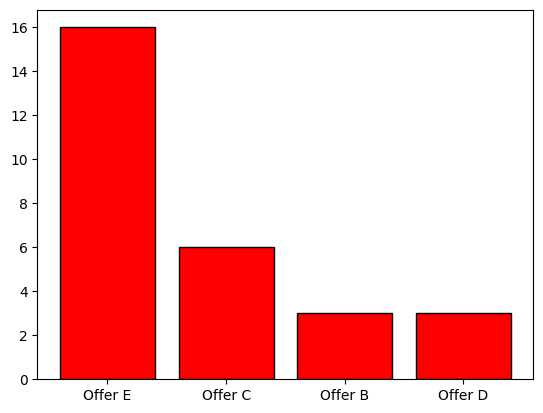

In [19]:
offer_competitor_counts = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Competitor made better offer') & (churned_customers_issues['Churn Category'] == 'Competitor')]['Offer'].value_counts()
plt.bar(offer_competitor_counts.index,offer_competitor_counts.values,color='red',edgecolor='black')


Now for the people who choose that the competitor had more data,we have to know what kind of internet they used

<BarContainer object of 3 artists>

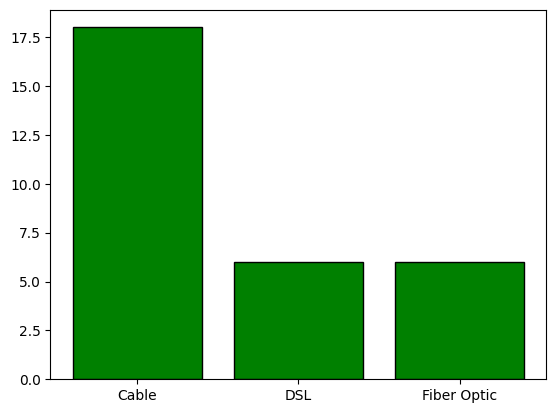

In [20]:
internet_type_counts1 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Competitor offered more data') & (churned_customers_issues['Churn Category'] == 'Competitor')]['Internet Type'].value_counts()
internet_type_counts1
plt.bar(internet_type_counts1.index,internet_type_counts1.values,color='green',edgecolor='black')

as a matter of fact,if a customer has multiple lines , it means that Each "line" represents a separate connection that can be used for various services such as internet access(data).So let's see if these customers have multiple lines or not to check if the problem is happening for each line or not.

([<matplotlib.patches.Wedge at 0x1f632a38fa0>,
 [Text(-0.33991877217145816, 1.046162142464278, 'Yes'),
  Text(0.3399188701202255, -1.0461621106387813, 'No')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.0%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.0%')])

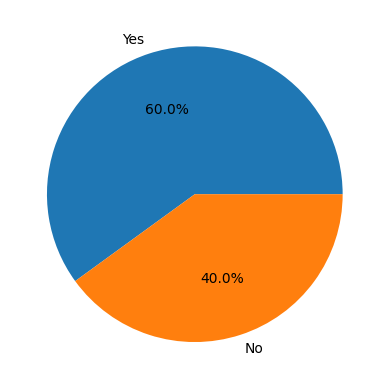

In [21]:
lines_count1 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Competitor offered more data') & (churned_customers_issues['Churn Category'] == 'Competitor')]['Multiple Lines'].value_counts()
lines_count1 = lines_count1.to_frame()
plt.pie(lines_count1['count'], labels=lines_count1.index, autopct='%1.1f%%')

Now for the people who choose that the competitor offered higher download speeds,we have to know what kind of internet they used

<BarContainer object of 3 artists>

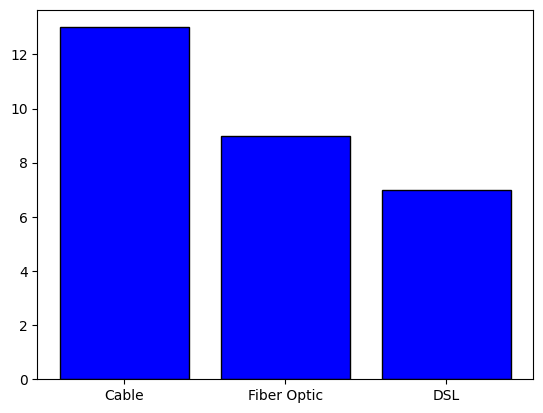

In [22]:
internet_type_counts3 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Competitor offered higher download speeds') & (churned_customers_issues['Churn Category'] == 'Competitor')]['Internet Type'].value_counts()
plt.bar(internet_type_counts3.index,internet_type_counts3.values,color='blue',edgecolor='black')

let us now see the Avg Monthly GB Download by the customers with this same churn reason

(array([6., 4., 7., 3., 1., 1., 4., 0., 2., 1.]),
 array([ 3. , 12.1, 21.2, 30.3, 39.4, 48.5, 57.6, 66.7, 75.8, 84.9, 94. ]),
 <BarContainer object of 10 artists>)

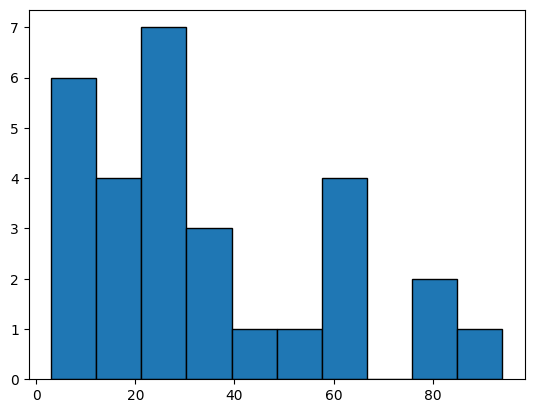

In [23]:
GBDownload_per_customer = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Competitor offered higher download speeds') & (churned_customers_issues['Churn Category'] == 'Competitor')]['Avg Monthly GB Download'].value_counts()
index_list = GBDownload_per_customer.index.tolist()
values_list = GBDownload_per_customer.values.tolist()
plt.hist(index_list, bins=10, weights=values_list, edgecolor='black')

now that we talked about the competitor as a churn category we move to another category which is the dissatisfaction (based on [Churn Category ](#ChurnCategory) it is less high than the competitor)
### Dissatisfaction

In [24]:
counts3 = churned_customers_issues[churned_customers_issues['Churn Category'] == 'Dissatisfaction']['Churn Reason'].value_counts()
counts3=counts3.to_frame()
counts3

,count
Churn Reason,
Network reliability,66
Product dissatisfaction,63
Service dissatisfaction,53
Limited range of services,12
Lack of self-service on Website,10
Poor expertise of online support,4
Poor expertise of phone support,4


For Network reliability let us check:which phone/internet services?which internet type?

<BarContainer object of 2 artists>

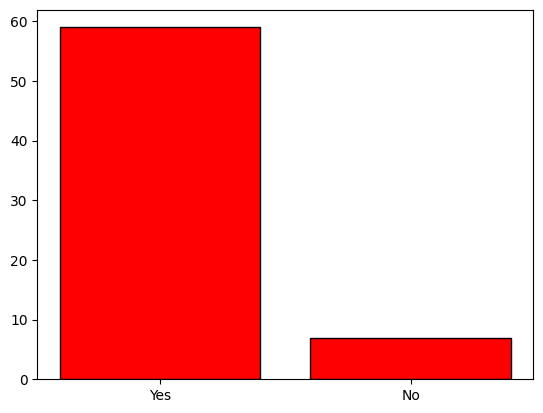

In [25]:
phone_service_counts2 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Network reliability') & (churned_customers_issues['Churn Category'] == 'Dissatisfaction')]['Phone Service'].value_counts()
plt.bar(phone_service_counts2.index,phone_service_counts2.values,color='red',edgecolor='black')

<BarContainer object of 3 artists>

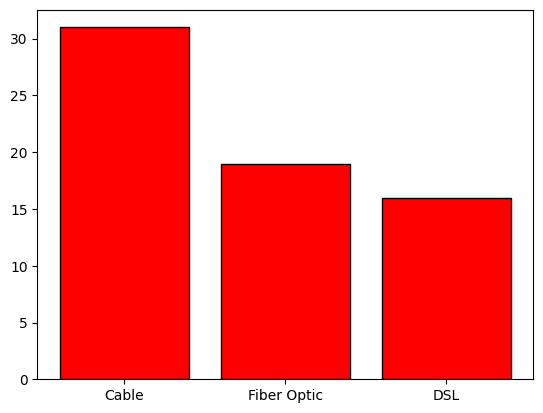

In [27]:
internet_type_counts2 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Network reliability') & (churned_customers_issues['Churn Category'] == 'Dissatisfaction')]['Internet Type'].value_counts()
plt.bar(internet_type_counts2.index,internet_type_counts2.values,color='red',edgecolor='black')

We move now to the Product dissatisfaction that can be indirectly connected to :
offer:which offer we provided to the client /unlimited data:the client may have experienced poor performance during peak usage times.

<BarContainer object of 5 artists>

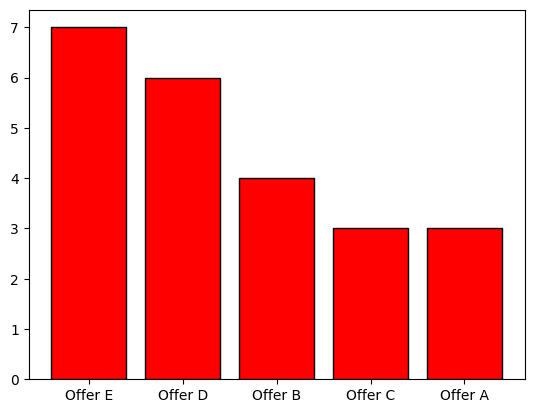

In [28]:
offer_counts3 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Product dissatisfaction') & (churned_customers_issues['Churn Category'] == 'Dissatisfaction')]['Offer'].value_counts()
plt.bar(offer_counts3.index,offer_counts3.values,color='red',edgecolor='black')

<BarContainer object of 2 artists>

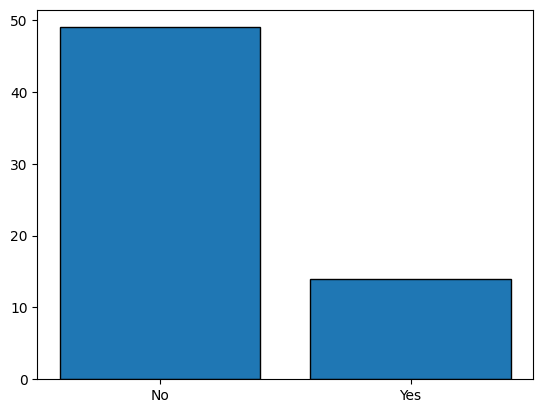

In [29]:
unlimitedData_counts3 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Product dissatisfaction') & (churned_customers_issues['Churn Category'] == 'Dissatisfaction')]['Unlimited Data'].value_counts()
plt.bar(unlimitedData_counts3.index,unlimitedData_counts3.values,edgecolor='black')

Now we move to service dissatisfaction:what offer did we provide?what internet/phone service were provided?

<BarContainer object of 5 artists>

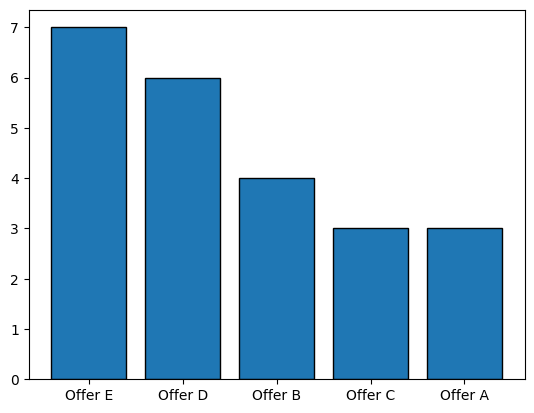

In [30]:
offer_counts4 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Service dissatisfaction') & (churned_customers_issues['Churn Category'] == 'Dissatisfaction')]['Offer'].value_counts()
plt.bar(offer_counts3.index,offer_counts3.values,edgecolor='black')

<BarContainer object of 3 artists>

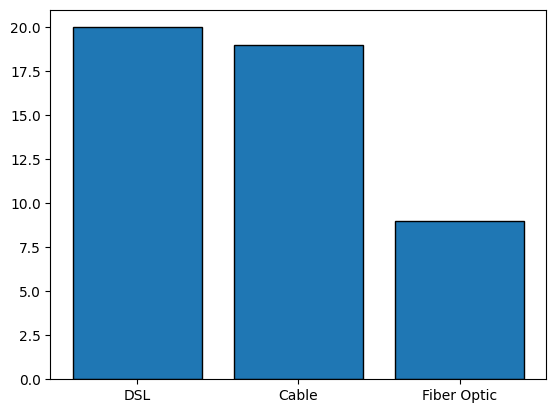

In [31]:
internettype_counts4 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Service dissatisfaction') & (churned_customers_issues['Churn Category'] == 'Dissatisfaction')]['Internet Type'].value_counts()
plt.bar(internettype_counts4.index,internettype_counts4.values,edgecolor='black')

<BarContainer object of 2 artists>

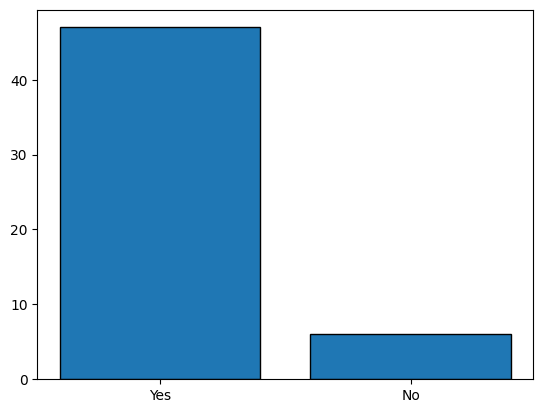

In [32]:
phoneservice_counts4 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Service dissatisfaction') & (churned_customers_issues['Churn Category'] == 'Dissatisfaction')]['Phone Service'].value_counts()
plt.bar(phoneservice_counts4.index,phoneservice_counts4.values,edgecolor='black')

now that we worked on the prevalent churn reasons for the churn category "Dissatisfaction"
we move to another category which is :
### Attitude


([<matplotlib.patches.Wedge at 0x1f632fc6680>,
 [Text(-0.7101905664333933, 0.8400174756212017, 'Attitude of support person'),
  Text(0.710190487785278, -0.8400175421140377, 'Attitude of service provider')],
 [Text(-0.38737667260003267, 0.45819135033883723, '72.3%'),
  Text(0.3873766297010607, -0.45819138660765685, '27.7%')])

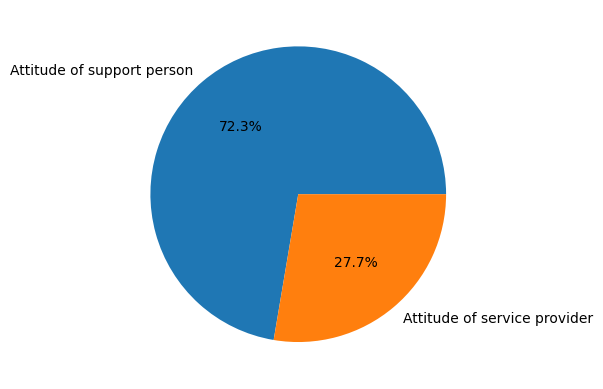

In [33]:
counts4 = churned_customers_issues[churned_customers_issues['Churn Category'] == 'Attitude']['Churn Reason'].value_counts()
counts4=counts4.to_frame()
plt.pie(counts4['count'], labels=counts4.index, autopct='%1.1f%%')

In [34]:
cities_counts4=churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Attitude of support person') & (churned_customers_issues['Churn Category'] == 'Attitude')]['City'].value_counts()
cities_counts4


City
San Diego         4
San Dimas         2
Salinas           2
Glendale          2
Tujunga           2
Rosemead          2
Tustin            1
Los Angeles       1
Fort Bidwell      1
Camptonville      1
Garden Valley     1
Brea              1
San Francisco     1
Bodfish           1
Alpaugh           1
Garden Grove      1
Sun City          1
Anaheim           1
Concord           1
Pacific Grove     1
Fawnskin          1
Pope Valley       1
Rio Vista         1
Stratford         1
Visalia           1
Burlingame        1
Hydesville        1
Elk Grove         1
Wendel            1
La Puente         1
Solana Beach      1
Sugarloaf         1
Loleta            1
Angelus Oaks      1
Pleasanton        1
Long Beach        1
Sylmar            1
Burbank           1
Novato            1
San Bernardino    1
Oakland           1
San Pablo         1
Blue Lake         1
Oceano            1
Big Pine          1
Moraga            1
Thousand Oaks     1
Forest Ranch      1
Glendora          1
San Marcos     

we notice that San Diego has the highest value but that does not mean we have to neglect other cities.=>check support person's attitude towards customers.

Now we move to the fourth  churn category which is 
### Price

In [35]:
counts5 = churned_customers_issues[churned_customers_issues['Churn Category'] == 'Price']['Churn Reason'].value_counts()
counts5=counts5.to_frame()
counts5

,count
Churn Reason,
Price too high,20
Long distance charges,19
Extra data charges,13
Lack of affordable download/upload speed,12


Let's start with the churn reason:Price too high. Let's check the Monthly Charge,Total Regular Charges and Total refunds

In [36]:
monthlycharge_counts5=churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Price too high') & (churned_customers_issues['Churn Category'] == 'Price')]['Monthly Charge'].value_counts()
monthlycharge_counts5

Monthly Charge
97.604     1
110.188    1
104.364    1
72.800     1
72.852     1
92.924     1
100.464    1
90.532     1
83.096     1
102.856    1
83.720     1
85.696     1
104.260    1
88.608     1
84.500     1
77.168     1
26.260     1
98.852     1
61.776     1
71.396     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Monthly Charges')

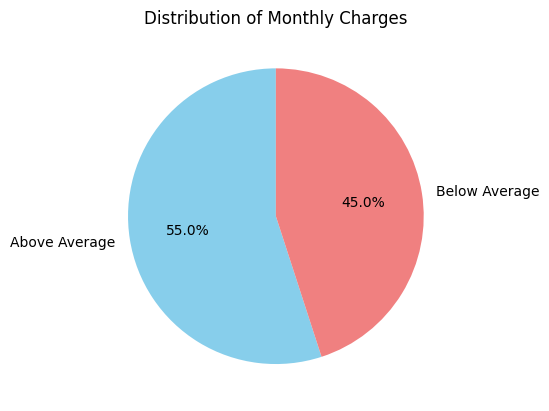

In [37]:
monthly_charge_values = [97.604, 110.188, 104.364, 72.800, 72.852, 92.924, 100.464, 90.532, 83.096, 102.856, 83.720, 85.696, 104.260, 88.608, 84.500, 77.168, 26.260, 98.852, 61.776, 71.396]
average_monthly_charge = sum(monthly_charge_values) / len(monthly_charge_values)
labels = ['Above Average', 'Below Average']
n1=0
n2=0
for value in monthly_charge_values:
    if(value>average_monthly_charge):
        n1 += 1
    else:
        n2 += 1

values=[n1,n2]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Monthly Charges')

now that we know the average monthly charge we start comparing in order to see how many clients are paying more than the avg amount

the clients are paying above average charges(>85) for these reasons:
#### basic reasons:
premium services, additional features, or increased usage.
#### others:
issues to be checked.
=>We have to check more details about these customers

Text(0.5, 1.0, 'Distribution of Total Charges')

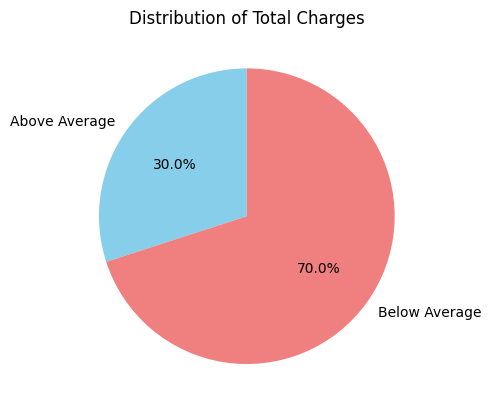

In [42]:
totalcharges_counts5 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Price too high') & (churned_customers_issues['Churn Category'] == 'Price')]['Total Regular Charges'].value_counts()
total_charges_values = [5574.75, 2655.25, 1358.85 ,70.00, 346.40 , 631.85,291.90 ,762.10,3326.20,1120.95,502.85,1592.35,1064.65,3969.35 ,585.95,74.20 ,25.25,4888.70 ,1023.90,68.65 ]
total_charges_avg = sum(total_charges_values) / len(total_charges_values)
x1=0
x2=0
for value in total_charges_values:
    if(value>total_charges_avg):
        x1 += 1
    else:
        x2 += 1
values1=[x1,x2]

plt.pie(values1, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Total Charges')

In [43]:
total_refund_counts5=churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Price too high') & (churned_customers_issues['Churn Category'] == 'Price')]['Total Refunds'].value_counts()
total_refund_counts5

Total Refunds
0.00     17
8.13      1
33.43     1
34.09     1
Name: count, dtype: int64

we notice that 85% of the customers did not get refunds it may be a positive point that indicates:client satisfaction/transparent pricing but it can not always be positive

now we move to the second high churn reason which is:Long distance charges where we use Total Long Distance Charges to analyse this reason

Text(0.5, 1.0, 'Distribution of Total Long Distance Charges')

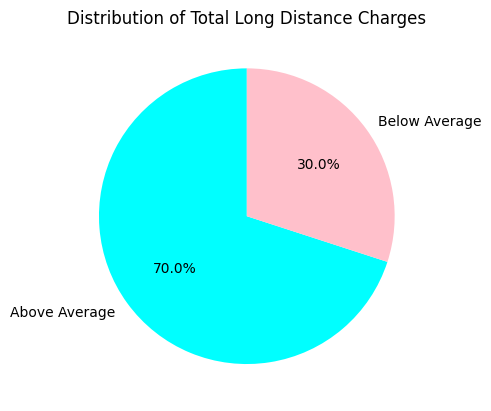

In [44]:

Total_Long_Distance_Charges_counts=churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Price too high') & (churned_customers_issues['Churn Category'] == 'Price')]['Total Long Distance Charges'].value_counts()
Total_Long_Distance_Charges_list = [636.02, 1158.50, 88.14, 38.80, 71.30, 257.88, 29.85, 364.72, 1855.66, 419.04, 216.72, 732.00, 244.80, 791.01, 40.16, 48.95, 0.00, 1578.00, 589.28, 12.40]
Total_Long_Distance_Charges_avg = sum(Total_Long_Distance_Charges_list) / len(Total_Long_Distance_Charges_list)
x1=0
x2=0
for value in total_charges_values:
    if(value>Total_Long_Distance_Charges_avg):
        x1 += 1
    else:
        x2 += 1
values1=[x1,x2]

plt.pie(values1, labels=labels, autopct='%1.1f%%', startangle=90, colors=['cyan', 'pink'])
plt.title('Distribution of Total Long Distance Charges')

now for the Extra data charges we can redo the same steps we followed while representing the churn reason:Price Too high where we compared the total charges with the average charges.As we said before the 'above average' charges can be related to premium services and others but in this case if a client used extra data charges as a churn reason that means that the option we talked about ie excluded.

Text(0.5, 1.0, 'Distribution of Total Regular Charges')

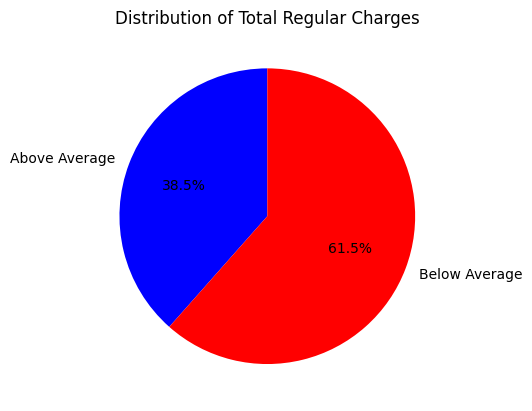

In [50]:
totalcharges_counts6 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Extra data charges') & (churned_customers_issues['Churn Category'] == 'Price')]['Total Regular Charges'].value_counts()
totalcharges_list6 = [131.65, 1660.00, 662.65, 5341.80, 4154.80, 2317.10, 46.30, 2043.45, 365.40, 741.70, 654.85, 480.60, 865.80]
Total_Charges_avg6 = sum(totalcharges_list6) / len(totalcharges_list6)
x1=0
x2=0
for value in totalcharges_list6:
    if(value>Total_Charges_avg6):
        x1 += 1
    else:
        x2 += 1
values1=[x1,x2]

plt.pie(values1, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Distribution of Total Regular Charges')

now for the Total Extra Data Charges 

In [52]:
totalEDcharges_counts6 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Extra data charges') & (churned_customers_issues['Churn Category'] == 'Price')]['Total Extra Data Charges'].value_counts()
totalEDcharges_counts6

Total Extra Data Charges
0.00      4
3.03      1
465.00    1
139.00    1
748.00    1
125.00    1
490.00    1
55.00     1
223.00    1
87.00     1
Name: count, dtype: int64

now we select the people who have their data charges>0 to dig deeper into this issue

17.727272727272727


Text(0.5, 1.0, 'Distribution of total GB downloaded')

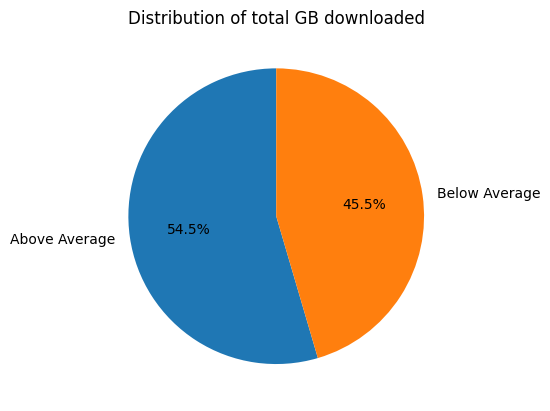

In [59]:
GBdownloaded_ED6=churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Extra data charges') & (churned_customers_issues['Churn Category'] == 'Price')]['Avg Monthly GB Download'].value_counts()
GBdownloaded_ED6_list={23,23,21,21,28,14,3,24,15,30,11,18,8}
GBdownloaded_ED6_avg= sum(GBdownloaded_ED6_list) / len(GBdownloaded_ED6_list)
print(GBdownloaded_ED6_avg)
x1=0
x2=0
for value in GBdownloaded_ED6_list:
    if(value>GBdownloaded_ED6_avg):
        x1 += 1
    else:
        x2 += 1
values1=[x1,x2]

plt.pie(values1, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of total GB downloaded')


now that we found that 54,5% of the customers, who claimed that chose Extra Data charges as a churn reason,are basically spending their data more than the normal customers to be specific they are downloading more than around 18 GB in total.

Finishing with 'Lack of affordable download/upload speed' as a churn reason:as a matter of fact we know that having an increased number of people/family members using the same internet line will obviously affect the upload speed that's why we are going to rely on:Dependents/Number of dependts to check if the problem is external.Then we will have to check the internet type and the offer.

In [66]:
Dependents_count7=churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Lack of affordable download/upload speed') & (churned_customers_issues['Churn Category'] == 'Price')]['Dependents'].value_counts()
Dependents_count7

Dependents
No    12
Name: count, dtype: int64

Now that we have 100% of the customers have no dependents.We move to identifying the internal problems


<BarContainer object of 3 artists>

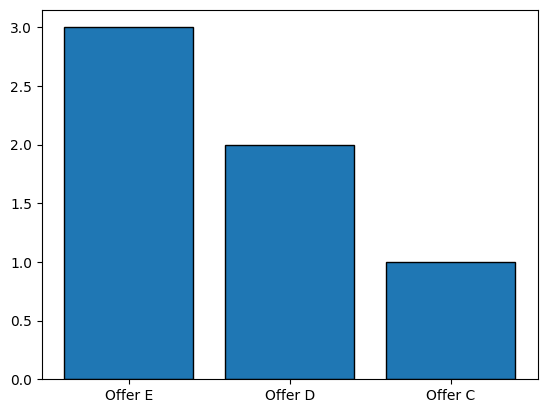

In [68]:
offer_counts7 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Lack of affordable download/upload speed') & (churned_customers_issues['Churn Category'] == 'Price')]['Offer'].value_counts()
plt.bar(offer_counts7.index,offer_counts7.values,edgecolor='black')

<BarContainer object of 3 artists>

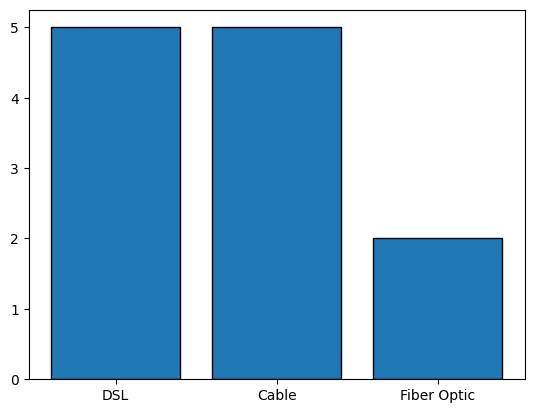

In [69]:
internet_type_counts7 = churned_customers_issues[(churned_customers_issues['Churn Reason'] == 'Lack of affordable download/upload speed') & (churned_customers_issues['Churn Category'] == 'Price')]['Internet Type'].value_counts()
plt.bar(internet_type_counts7.index,internet_type_counts7.values,edgecolor='black')

### To sum up:
we worked on the 3 major churn reasons possible in this database which are:1/Competitor 2/Dissatisfaction 3/Price and for each we studied and analyzed the churn categories possible using the given informations from our database while trying to find the motives that can push our customer to choose such reason or such category.